# Mini Project 5

Name: Vinit Mehta

Roll: 2022111001

## Advertising Dataset

### About the dataset
- This data expresses sales according to the type of advertisement and the size of the cost.
- The dataset contains 200 rows of 3 features [TV, Radio, Newspaper] and target variable [Sales].
- Each of the feature row (`TV, Radio, Newspaper`) represents amount in unit of `1000$` and `Sales` in `M$`.

### Assumptions
- The data is for different companies around the same time period (Data is spatial not temporal).
- All the companies belong to same sector/industry.

### Imports

In [149]:
import pandas as pd
import numpy as np
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D

### Reading data

In [150]:
# Reading the data from the csv
dataset_path = "./Advertising.csv"
df = pd.read_csv(dataset_path)

data = df.to_numpy()

# Calculating the number of datapoints we have
n_datapoints = data.shape[0]
print(f"Number of datapoints in the dataset = {n_datapoints}")

tv_cost = data[:, 1]        # In 1000$
radio_cost = data[:, 2]     # In 1000$
newspaper_cost = data[:, 3] # In 1000$
sales = data[:, 4]          # In M$

# Setting style for all the upcoming plots
sns.set_style("whitegrid")

# Seaborn takes input in the form of a dataframe for most of the functions
df = pd.DataFrame({
    "TV": tv_cost,
    "Radio": radio_cost,
    "Newspaper": newspaper_cost,
    "Sales": sales
})

# Variable for holding the total expenditure data for each respective row
total_expenditure = df["TV"] + df["Radio"] + df["Newspaper"]

colors = sns.color_palette("Set2", len(df.columns) + 2)

# Checking for missing values
n_missing_values = df.isnull().sum()
print("\nNumber of missing Values in Each Column:")
for i in range(len(list(df.columns))):
    print(f"{df.columns[i]}: {list(n_missing_values)[i]}")

Number of datapoints in the dataset = 200

Number of missing Values in Each Column:
TV: 0
Radio: 0
Newspaper: 0
Sales: 0


### Descriptive Statistics

In [151]:
# Printing mean, sd, min and max values for each of the feature and target variable
table = PrettyTable()
table.field_names = ["Metric", "TV Cost (1000$)", "Radio Cost (1000$)", "Newspaper Cost (1000$)", "Sales (M$)"]
table.add_row(["Mean", round(np.mean(tv_cost), 3), round(np.mean(radio_cost), 3), round(np.mean(newspaper_cost), 3), round(np.mean(sales), 3)])
table.add_row(["Median", round(np.median(tv_cost), 3), round(np.median(radio_cost), 3), round(np.median(newspaper_cost), 3), round(np.median(sales), 3)])
table.add_row(["Std Dev", round(np.std(tv_cost, ddof=1), 3), round(np.std(radio_cost, ddof=1), 3), round(np.std(newspaper_cost, ddof=1), 3), round(np.std(sales, ddof=1), 3)])
table.add_row(["Min", round(np.min(tv_cost), 3), round(np.min(radio_cost), 3), round(np.min(newspaper_cost), 3), round(np.min(sales), 3)])
table.add_row(["Max", round(np.max(tv_cost), 3), round(np.max(radio_cost), 3), round(np.max(newspaper_cost), 3), round(np.max(sales), 3)])
print(table)

+---------+-----------------+--------------------+------------------------+------------+
|  Metric | TV Cost (1000$) | Radio Cost (1000$) | Newspaper Cost (1000$) | Sales (M$) |
+---------+-----------------+--------------------+------------------------+------------+
|   Mean  |     147.042     |       23.264       |         30.554         |   14.022   |
|  Median |      149.75     |        22.9        |         25.75          |    12.9    |
| Std Dev |      85.854     |       14.847       |         21.779         |   5.217    |
|   Min   |       0.7       |        0.0         |          0.3           |    1.6     |
|   Max   |      296.4      |        49.6        |         114.0          |    27.0    |
+---------+-----------------+--------------------+------------------------+------------+


### Pie Chart to analyse the distribution of various forms of advertisement

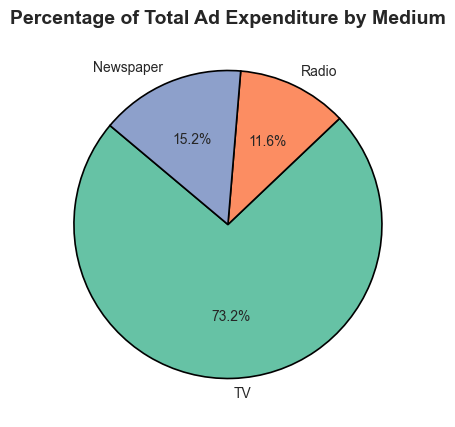

In [152]:
total_tv = np.sum(tv_cost)
total_radio = np.sum(radio_cost)
total_newspaper = np.sum(newspaper_cost)
labels = ["TV", "Radio", "Newspaper"]
values = [total_tv, total_radio, total_newspaper]
plt.figure(figsize=(5, 5))
plt.pie(
    values, labels=labels, autopct="%1.1f%%", startangle=140, 
    colors=colors[:3], wedgeprops={"edgecolor": "black", "linewidth": 1.2}
)
plt.title("Percentage of Total Ad Expenditure by Medium", fontsize=14, fontweight="bold")
plt.savefig("./pie_chart_percentage_medium.png")
plt.show()


### Box + Violin Plot

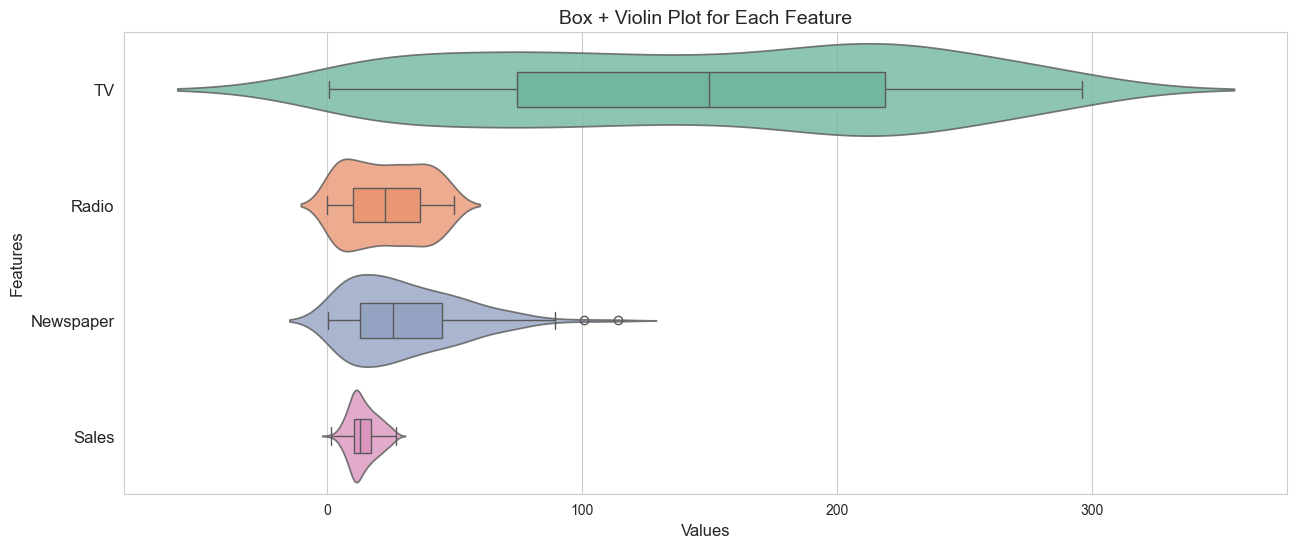

In [153]:
plt.figure(figsize=(15, 6))
feature_names = ["TV", "Radio", "Newspaper", "Sales"]
sns.violinplot(data=[tv_cost, radio_cost, newspaper_cost, sales], 
               palette=colors[:4],  # Colors for respective plots
               inner=None,          # Does not show inner details like quartiles and median 
               alpha=0.8,           # Transparency
               orient="h")          # Horizontal orientation
sns.boxplot(data=[tv_cost, radio_cost, newspaper_cost, sales], 
            width=0.3,              # Box width
            boxprops={'zorder': 2}, # Z-index (to show on top of violin plot)
            palette=colors[:4],     # Colors for repective boxes
            orient="h")             # Horizontal orientation
plt.yticks(ticks=[0, 1, 2, 3], labels=feature_names, fontsize=12)
plt.title("Box + Violin Plot for Each Feature", fontsize=14)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.savefig("./box_violin_plot.png")
plt.show()

### Scatter Plot and Regression Line

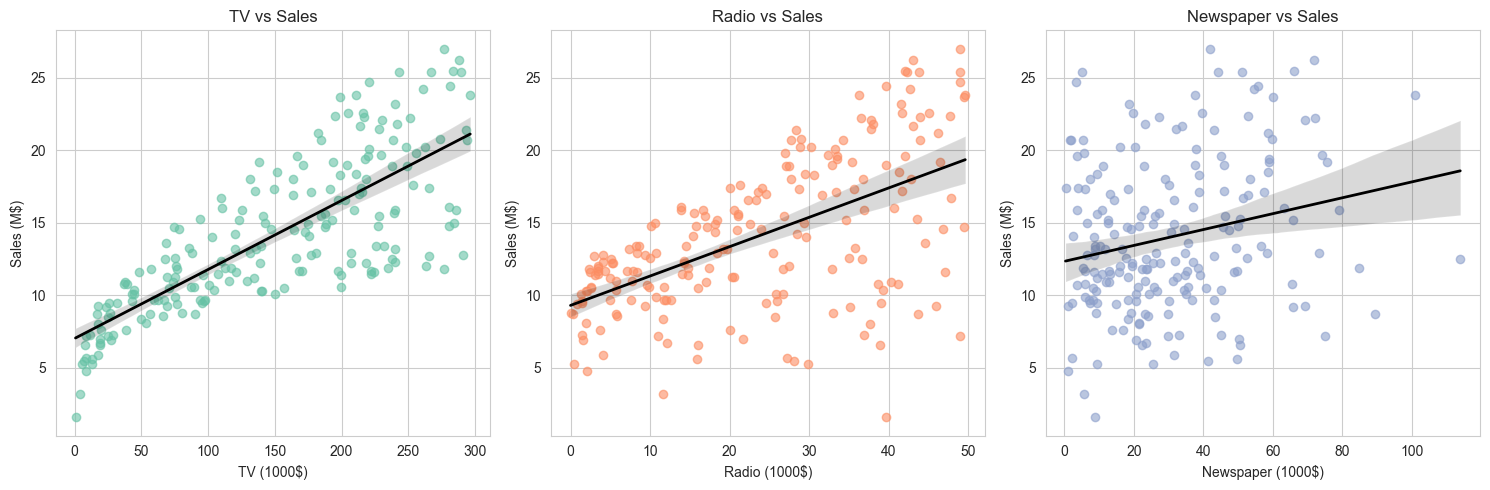

In [154]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, column in enumerate(df.columns[:-1]):
    sns.regplot(
        x=df[column], 
        y=df[df.columns[-1]], 
        ax=axes[i], 
        scatter_kws={"color": colors[i], "alpha": 0.6},
        line_kws={"color": "black", "lw": 2}
    )
    axes[i].set_title(f"{column} vs {df.columns[-1]}", fontsize=12)
    axes[i].set_xlabel(f"{column} (1000$)", fontsize=10)
    axes[i].set_ylabel(f"{df.columns[-1]} (M$)", fontsize=10)
plt.tight_layout()
plt.savefig("./scatter_plot_regression_line.png")
plt.show()

> The gray area around the line of linear regression depicts 95% confidence interval.

### Histograms

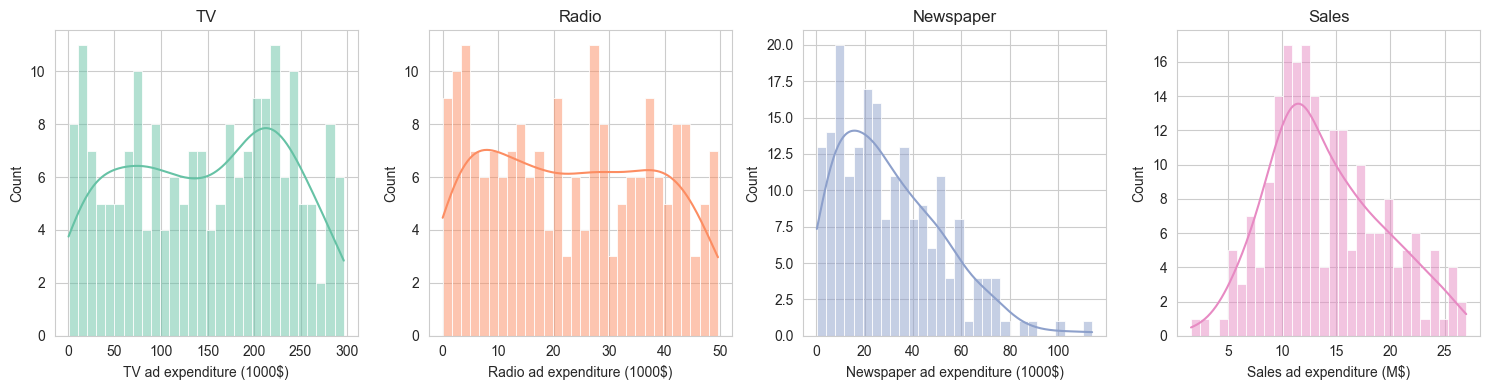

In [155]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.histplot(df[column], 
                 kde=True,  # Shows a smooth line of kernel density estimate
                 bins=30,   # Divides the whole range in 30 bins
                 ax=axes[i], 
                 color=colors[i])
    axes[i].set_title(column)
    if column in df.columns[:3]:
        axes[i].set_xlabel(column + " ad expenditure (1000$)")
        
    else:
        axes[i].set_xlabel(column + " ad expenditure (M$)")

plt.tight_layout()
plt.savefig("./histogram.png")
plt.show()

### Total Ads Expenditure Visualisation

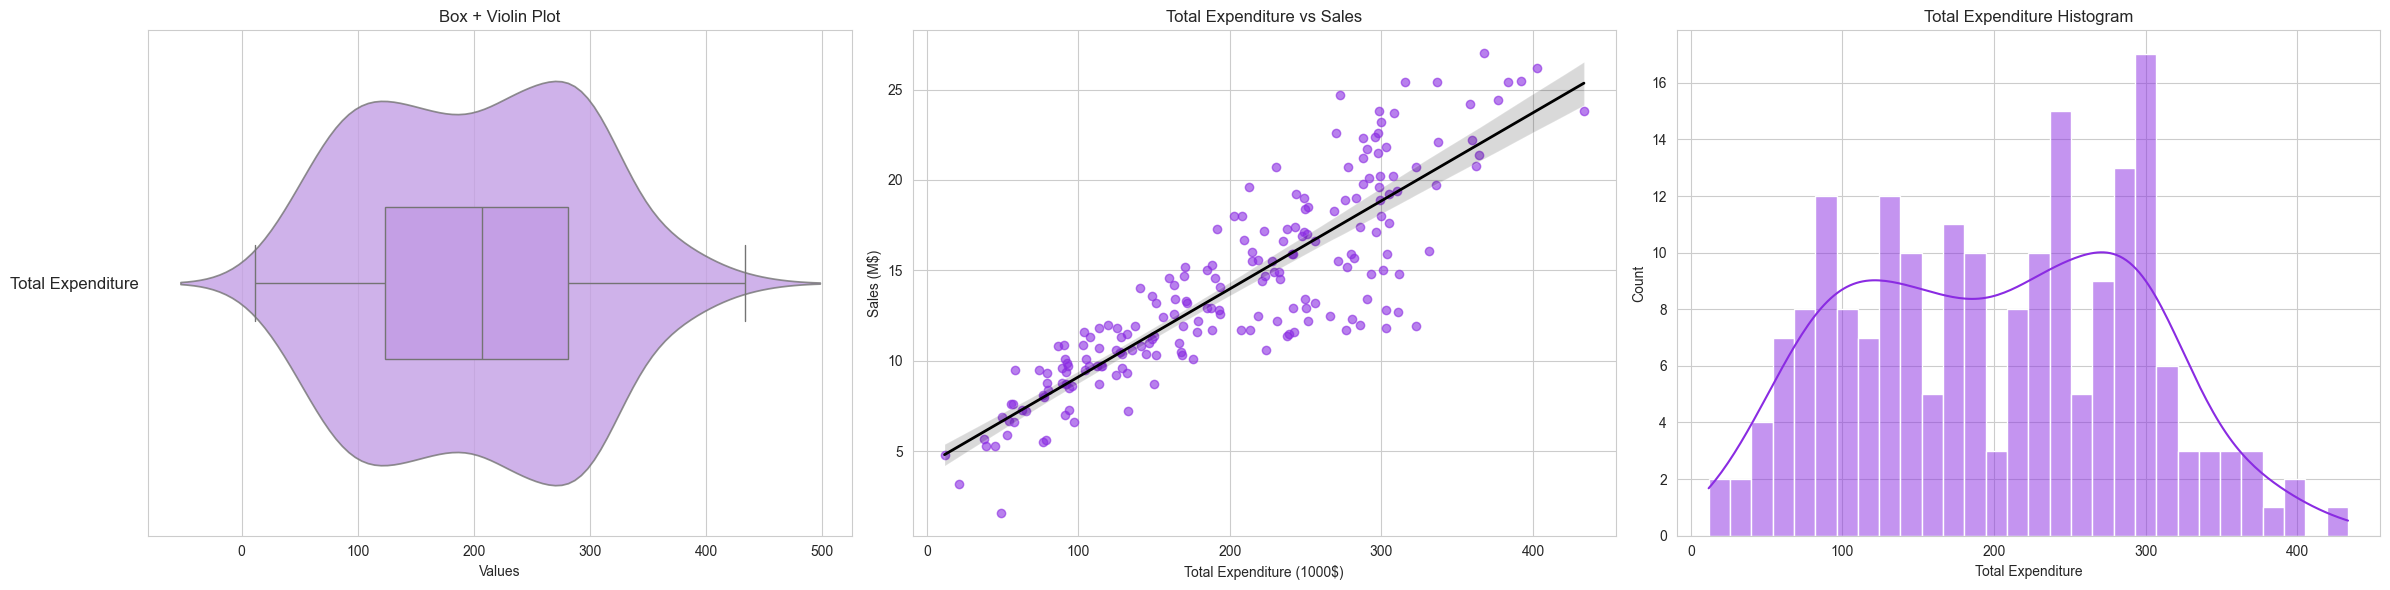

In [156]:
total_expenditure_df = pd.DataFrame({
    "Total Expenditure": total_expenditure
})

total_expenditure = total_expenditure_df["Total Expenditure"]

fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Violin + Box Plot
sns.violinplot(data=[total_expenditure], 
               palette=[(196/255, 148/255, 240/255, 0.8)],      # Box Color
               inner=None,         # No inner details
               alpha=0.8,          # Transparency
               orient="h",        # Horizontal orientation
               ax=axes[0])
sns.boxplot(data=[total_expenditure], 
            width=0.3,             # Box width
            boxprops={'zorder': 2}, # Show on top of violin plot
            palette=[(196/255, 148/255, 240/255, 0.8)],         # Box color
            orient="h",            # Horizontal orientation
            ax=axes[0])
axes[0].set_yticks([0])
axes[0].set_yticklabels(["Total Expenditure"], fontsize=12)
axes[0].set_title("Box + Violin Plot")
axes[0].set_xlabel("Values")

# Regression Plot
sns.regplot(x=total_expenditure, 
            y=sales, 
            scatter_kws={"color": "blueviolet", "alpha": 0.6},
            line_kws={"color": "black", "lw": 2},
            ax=axes[1])
axes[1].set_title("Total Expenditure vs Sales")
axes[1].set_xlabel("Total Expenditure (1000$)")
axes[1].set_ylabel("Sales (M$)")

# Histogram
sns.histplot(total_expenditure, 
             kde=True,  # Kernel density estimate
             bins=30,   # Number of bins
             color="blueviolet", 
             ax=axes[2])
axes[2].set_title("Total Expenditure Histogram")
axes[2].set_xlabel("Total Expenditure")

# Adjust layout
plt.tight_layout()
plt.savefig("./total_expenditure.png")
plt.show()

### Q-Q Plot

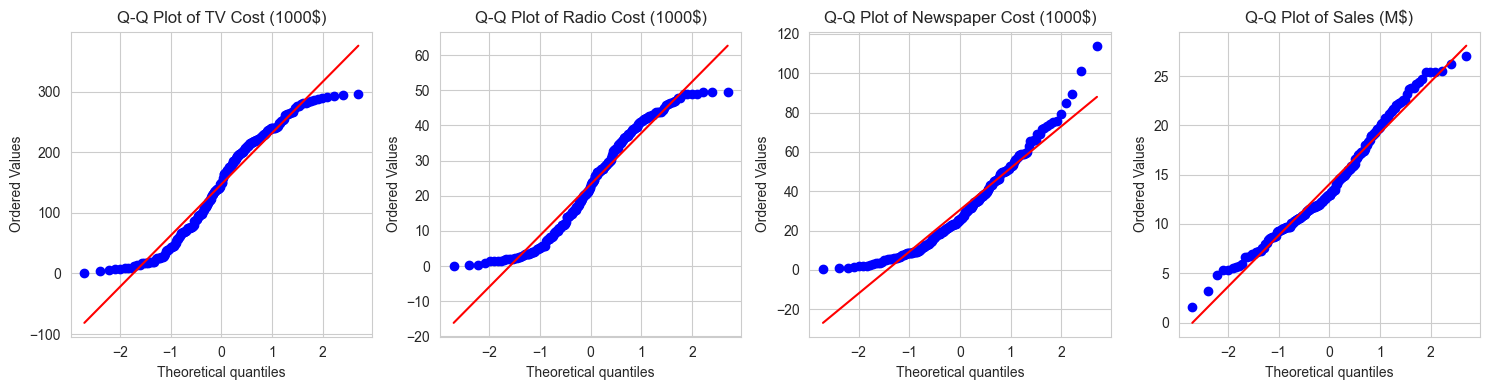

In [157]:
data_vars = [tv_cost, radio_cost, newspaper_cost, sales]
var_names = ["TV Cost (1000$)", "Radio Cost (1000$)", "Newspaper Cost (1000$)", "Sales (M$)"]
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
for i, (data, name) in enumerate(zip(data_vars, var_names)):
    stats.probplot(data, 
                   dist="norm", 
                   plot=axes[i])  # Normal Q-Q plot
    axes[i].set_title(f"Q-Q Plot of {name}")
plt.tight_layout()
plt.savefig("./q_q_plot.png")
plt.show()

### Testing normality

In [158]:
# IV: TV, Radio, Newpaper ads expenditure
# DV: Sales

# Since Number of samples (=200) > 50 we are using Kolmogorov–Smirnov test
p_values = []
for col in df.columns:
    ks_statistic, p_value = stats.kstest(df[col], 'norm', args=(np.mean(df[col]), np.std(df[col], ddof=1)))
    p_values.append(p_value)

    # Print results
    print(f"For {col}:")
    print(f"KS Statistic: {round(ks_statistic, 4)}")
    print(f"P-value: {round(p_value, 4)}")

    # Interpretation
    alpha = 0.05  # Significance level
    if p_value > alpha:
        print("Fail to reject the null hypothesis: Sample follows a normal distribution.\n")
    else:
        print("Reject the null hypothesis: Sample does NOT follow a normal distribution.\n")

For TV:
KS Statistic: 0.087
P-value: 0.0911
Fail to reject the null hypothesis: Sample follows a normal distribution.

For Radio:
KS Statistic: 0.084
P-value: 0.1126
Fail to reject the null hypothesis: Sample follows a normal distribution.

For Newspaper:
KS Statistic: 0.0985
P-value: 0.0384
Reject the null hypothesis: Sample does NOT follow a normal distribution.

For Sales:
KS Statistic: 0.0952
P-value: 0.0499
Reject the null hypothesis: Sample does NOT follow a normal distribution.



### Spearman's Correlation Matrix

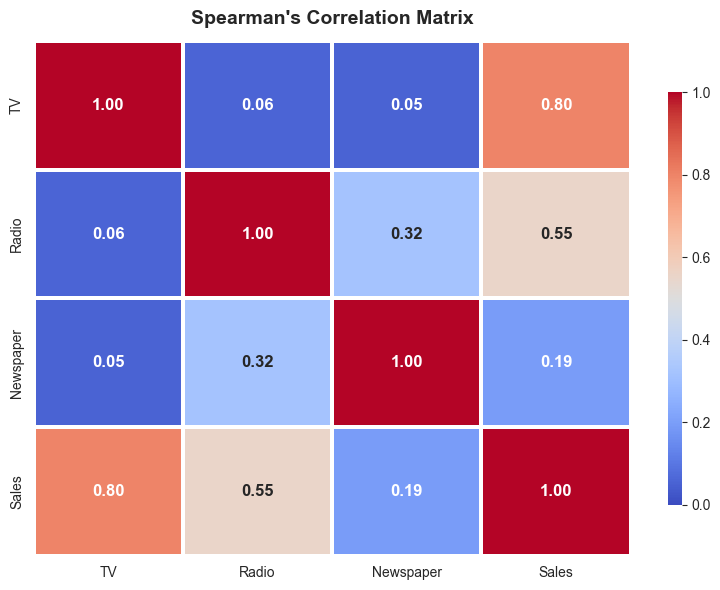

In [159]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    df.corr(method="spearman"),  # Generates a correlation matrix from the DataFrame and passes it to the heatmap
    annot=True,         # Displays the correlation values inside the heatmap cells
    cmap="coolwarm",    # Uses the "coolwarm" colormap (blue for low values, red for high values)
    fmt=".2f",          # Formats the correlation values to two decimal places
    linewidths=1.5,     # Sets the width of the lines between the heatmap cells
    linecolor="white",  # Defines the color of the grid lines separating the heatmap cells
    annot_kws={"size": 12, "weight": "bold"},  # Customizes annotation text size and boldness
    cbar_kws={"shrink": 0.8, "aspect": 30, "orientation": "vertical"},  # Customizes the color bar:
    # shrink: Adjusts the color bar size to 80% of the default
    # aspect: Controls the aspect ratio (height-to-width) of the color bar
    # orientation: Sets the color bar to vertical orientation
    vmin=0,             # Blue at value 0
    vmax=1              # Red at value 1
)

plt.title("Spearman's Correlation Matrix", fontsize=14, fontweight="bold", pad=12)
plt.tight_layout()
plt.savefig("./correlation_matrix.png")
plt.show()

### Expenditure Trend between highest and lowest sales

Average ad spend when sales are low (in M$): 27.377777777777773
Average ad spend when sales are high (in M$): 107.82365591397848


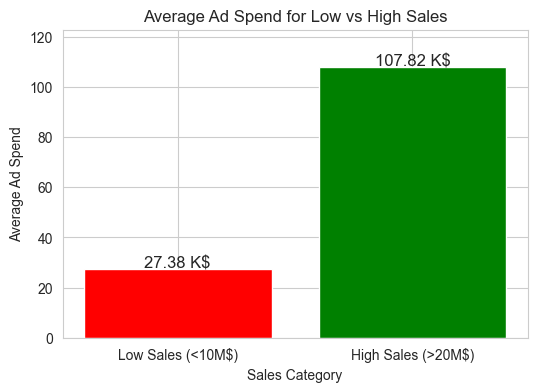

In [160]:
low = 10
high = 20

low_sales_df = df[df["Sales"] < low]
high_sales_df = df[df["Sales"] > high]

low_sales_avg_spend = low_sales_df[["TV", "Radio", "Newspaper"]].mean(axis=1).mean()
high_sales_avg_spend = high_sales_df[["TV", "Radio", "Newspaper"]].mean(axis=1).mean()

print(f"Average ad spend when sales are low (in M$): {low_sales_avg_spend}")
print(f"Average ad spend when sales are high (in M$): {high_sales_avg_spend}")

categories = ["Low Sales (<10M$)", "High Sales (>20M$)"]
values = [low_sales_avg_spend, high_sales_avg_spend]

# Plot bar graph
plt.figure(figsize=(6, 4))
plt.bar(categories, values, color=['red', 'green'], alpha=1)

# Labels and title
plt.xlabel("Sales Category")
plt.ylabel("Average Ad Spend")
plt.title("Average Ad Spend for Low vs High Sales")
plt.ylim(0, max(values) + 15)  # Adjust y-axis limit for better visualization

# Show values on bars
for i, v in enumerate(values):
    plt.text(i, v + 0.5, f"{round(v, 2)} K$", ha='center', fontsize=12)

# Show plot
plt.savefig("./high_low_bar_chart.png")
plt.show()

### Tests and Correlation

KS Statistic: 0.0702
P-value: 0.2657
Fail to reject the null hypothesis: Total Expenditure follows a normal distribution.

Spearman's Rank Correlation between Total Ad Expenditure and Sales:  0.8771


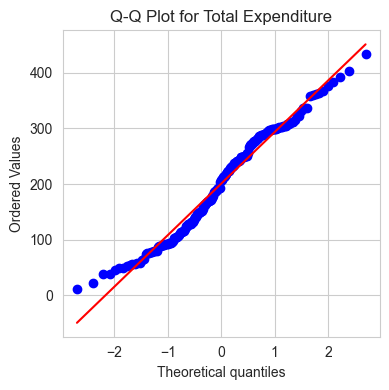

In [161]:
# Q-Q Plot
fig, axes = plt.subplots(1, 1, figsize=(4, 4))
stats.probplot(total_expenditure, dist="norm", plot=axes)

axes.set_title("Q-Q Plot for Total Expenditure")
plt.tight_layout()
plt.savefig("q_q_plot_total_expenditure.png")

# Kolmogorov-Smirnov Normality Test for Total Expenditure
ks_stat, p_value = stats.kstest(total_expenditure_df["Total Expenditure"], 'norm', args=(total_expenditure_df["Total Expenditure"].mean(), total_expenditure_df["Total Expenditure"].std()))
print(f"KS Statistic: {round(ks_stat, 4)}\nP-value: {round(p_value, 4)}")

# Checking if Total Expenditure follows a normal distribution
if p_value > 0.05:
    print("Fail to reject the null hypothesis: Total Expenditure follows a normal distribution.\n")
else:
    print("Reject the null hypothesis: Total Expenditure does NOT follow a normal distribution.\n")

# Compute spearman's correlation between Total_Ad_Expenditure and Sales
correlation_value = df["Sales"].corr(total_expenditure, method="spearman")
print("Spearman's Rank Correlation between Total Ad Expenditure and Sales: ", round(correlation_value, 4))

### A2S Ratio

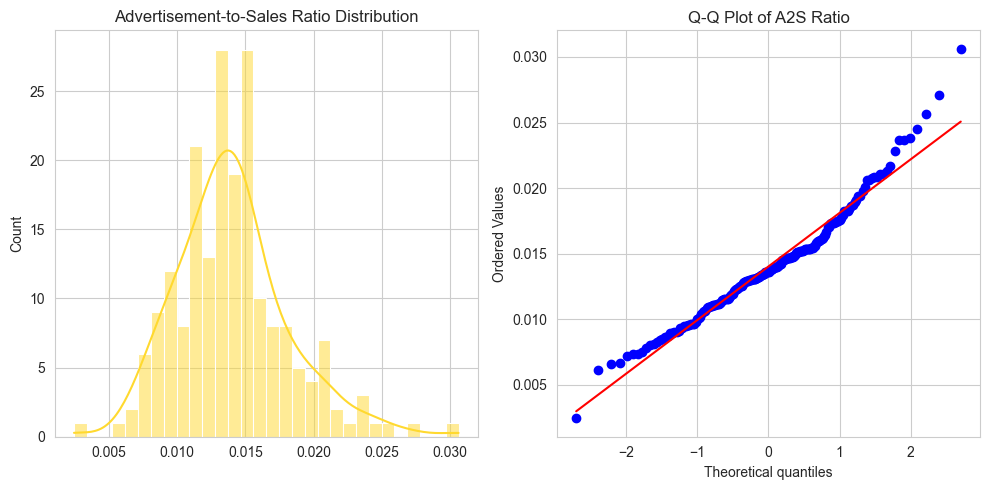

The average advertisement to sales ratio = 0.014


In [162]:
a2s_ratio = ((tv_cost + radio_cost + newspaper_cost) * 1000) / (sales * 1000000)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(a2s_ratio, 
            kde=True,  # Shows a smooth line of kernel density estimate
            bins=30,   # Divides the whole range in 30 bins
            ax=axes[0], 
            color=colors[-1])
axes[0].set_title("Advertisement-to-Sales Ratio Distribution")

stats.probplot(a2s_ratio, 
                dist="norm", 
                plot=axes[1])  # Normal Q-Q plot
axes[1].set_title(f"Q-Q Plot of A2S Ratio")

plt.tight_layout()
plt.savefig("./A2S.png")
plt.show()

avg_a2s_ratio = a2s_ratio.mean()
print(f"The average advertisement to sales ratio = {round(avg_a2s_ratio, 4)}")

> The Q-Q plot for A2S ratios shows heavy left and right tail implying it's resemblence to t-distribution (more weight in tail than normal distribution)

> A low ratio is considered to be best, as it suggests the campaign helped spark strong sales relative to the amount of money and resources used to advertise.

<span style="color:red;">Note: Some advertising campaigns are designed to foster long-term support, so a low advertising-to-sales ratio might not reflect the long-term benefits. </span>